# Data Analysis on Heart Disease Patient Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
import seaborn as sns; sns.set()  # for plot styling
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

## 1. Import data and summarise

In [ ]:
df = pd.read_csv('winequality-white.csv', delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

### 1.1 Distribution of Quality

Skewness: 0.155796
Kurtosis: 0.216526


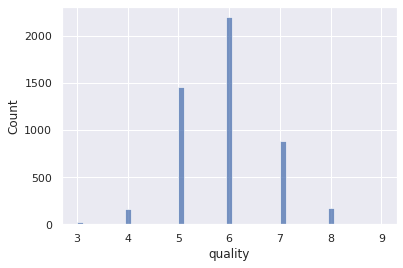

In [ ]:
sns.histplot(df['quality'])

#skewness and kurtosis
print("Skewness: %f" % df['quality'].skew())
print("Kurtosis: %f" % df['quality'].kurt())


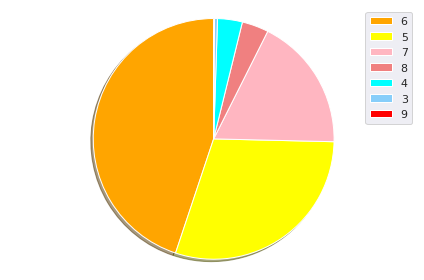

In [ ]:
# Visualising quality
temp = df['quality'].value_counts()
dfviz = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = dfviz['labels']
sizes = dfviz['values']
colors = ['orange', 'yellow', 'lightpink', 'lightcoral','cyan','lightskyblue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 1.2. Check for missing data
And delete it as appropiate.

In [ ]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [ ]:
# FOR FUTURE REFERENCE:
#total = df_train.isnull().sum().sort_values(ascending=False)
#percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)

## 2. Visualise relation between features and target variable (quality)

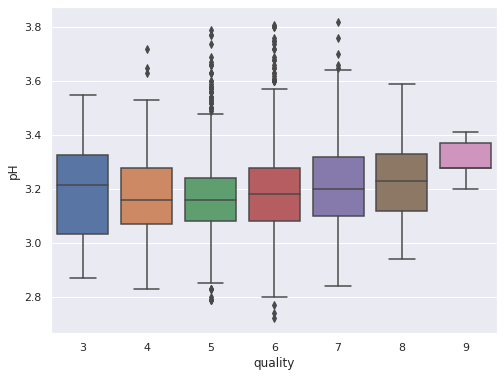

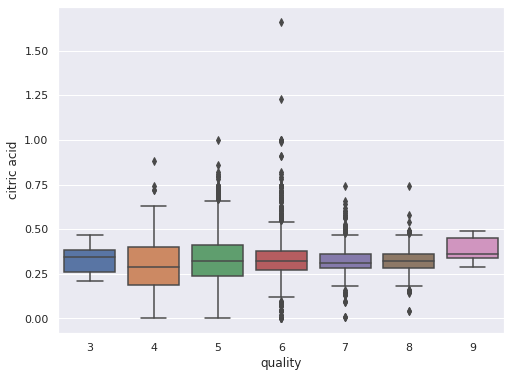

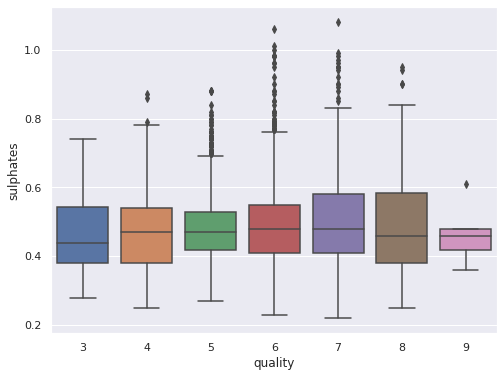

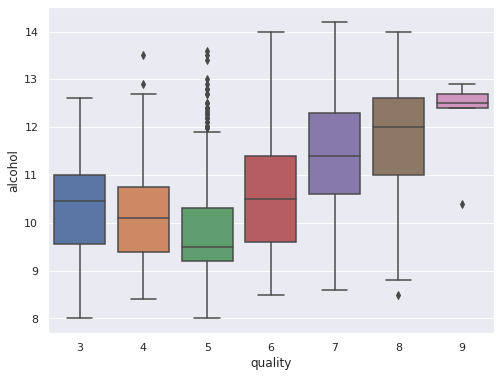

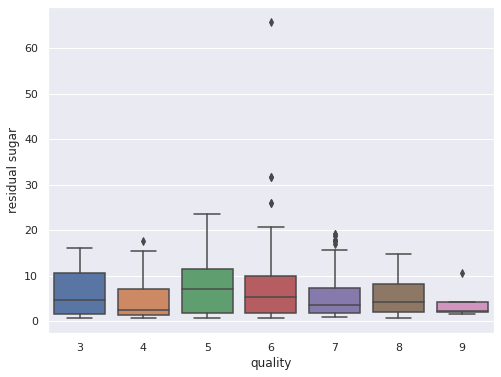

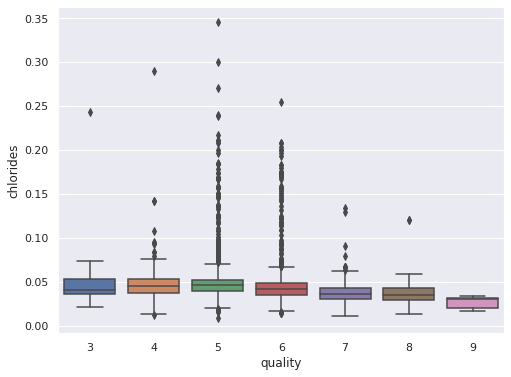

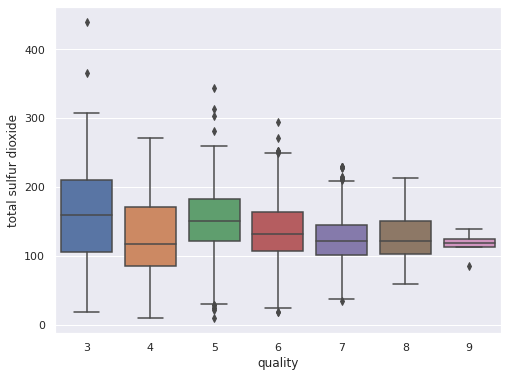

In [ ]:
#scatter plot grlivarea/saleprice
attributes = ['pH', 'citric acid', 'sulphates', 'alcohol', 'residual sugar', 'chlorides', 'total sulfur dioxide']
for var in attributes:
    data = pd.concat([df['quality'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x="quality", y=var, data=data)



### 2.1. Correlation matrix with heatmap

A few conclusions from this correlation matrix:
- Quality seems to only be directly correlated with alcohol.
- However, alcohol seems to be negatively correlated with density and residual sugar (and total sulfur dioxide a bit maybe).
- If we keep going, residual sugar seems to not be correlated with anything else other than with density (and total & free sulfur dioxide maybe, but perhaps at the same level as alcohol did).
- Looking at pH, citric acid and volatile acidity, they don't seem to be correlated with anything else at all. Would be interesting to do a classification with reduced features and another with a more ample array of features.

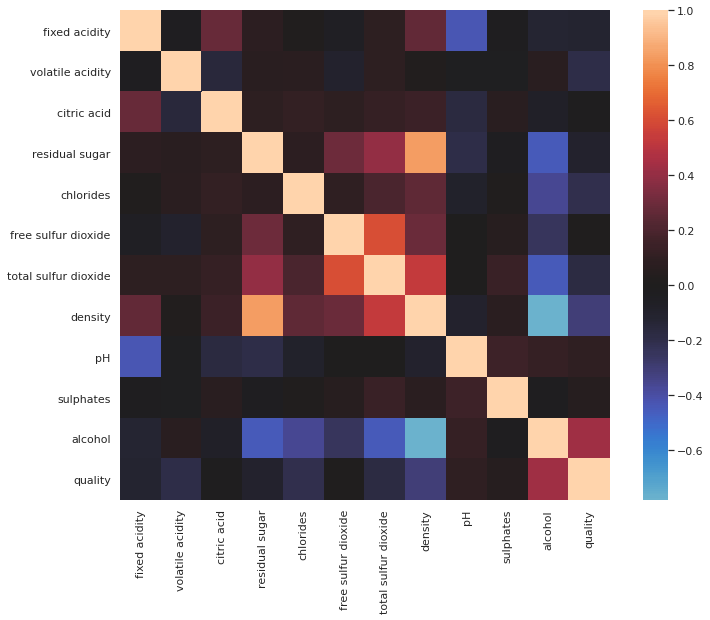

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, center=0, square=True);

### 2.2. Correlation with top 10 features and Quality

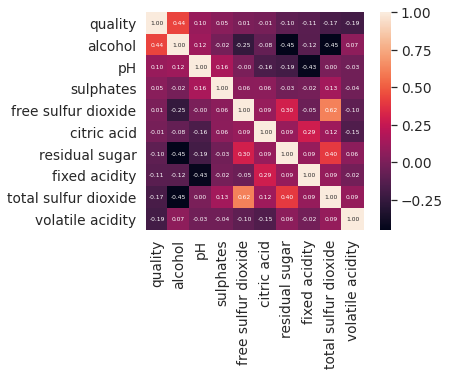

In [ ]:
# Zoomed into quality
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 2.3. Scatter plots across some of the higher correlated features

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


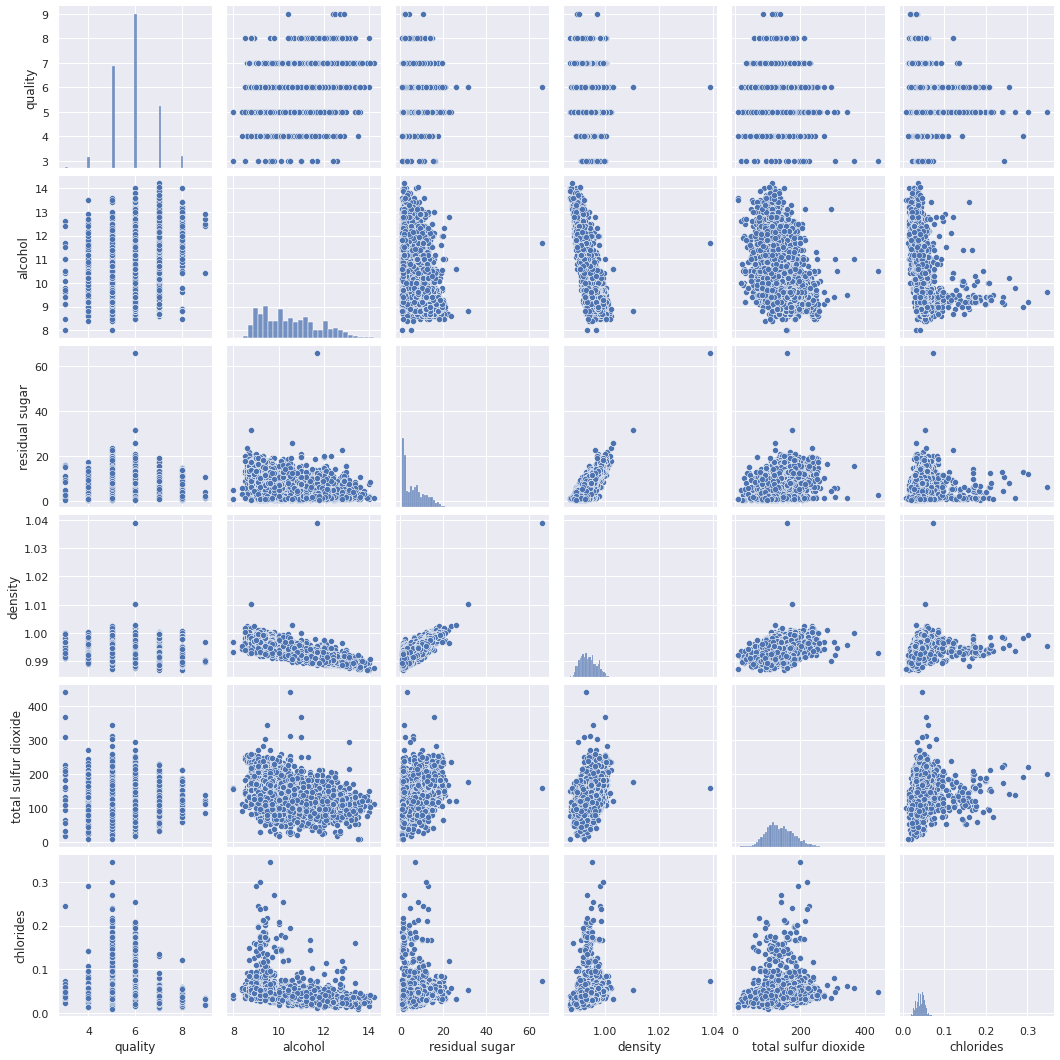

In [ ]:
#scatterplot
sns.set()
cols = ['quality', 'alcohol', 'residual sugar', 'density', 'total sulfur dioxide', 'chlorides']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df2 = df.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'pH', 'sulphates'], axis = 1)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3. Train and Run Model

In [ ]:
# Separate X and y variables
y = df['quality']
X = df.drop(['quality'], axis = 1, inplace = False)
X_norm = (X-X.mean())/X.std()
X_norm.head()

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.5)


##### 3.1 SVM Classifier

In [ ]:
# training a rbf SVM classifier 
svm_model_linear = svm.SVC(kernel = 'rbf', C = 100, gamma='scale').fit(X_train, y_train) 
svm_model_linear.decision_function_shape = "ovr"
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
score = svm_model_linear.score(X_test, y_test) 
print("Score is: ", score)

# accuracy score: 
print("Accuracy score: ", accuracy_score(y_test,svm_predictions) )

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions)
cm

Score is:  0.5904450796243365
Accuracy score:  0.5904450796243365


array([[  0,   2,   3,   3,   1,   0,   0],
       [  1,  25,  29,  25,   0,   0,   0],
       [  1,  29, 463, 233,  14,   1,   0],
       [  5,  29, 208, 719,  98,  22,   0],
       [  0,   2,  39, 174, 207,  32,   0],
       [  0,   4,   3,  20,  21,  32,   0],
       [  0,   0,   0,   2,   2,   0,   0]])

In [ ]:
print(classification_report(y_train, svm_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.01      0.01      0.01        83
           5       0.29      0.30      0.30       716
           6       0.45      0.48      0.46      1117
           7       0.17      0.13      0.15       426
           8       0.03      0.03      0.03        95
           9       0.00      0.00      0.00         1

    accuracy                           0.33      2449
   macro avg       0.14      0.14      0.14      2449
weighted avg       0.32      0.33      0.33      2449

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classi

#### 3.2 Decision Tree Classifier

In [ ]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[  0,   0,   4,   4,   1,   0,   0],
       [  0,   8,  44,  25,   2,   1,   0],
       [  2,  22, 431, 258,  28,   0,   0],
       [  0,  17, 247, 716,  92,   9,   0],
       [  0,   2,  29, 265, 148,  10,   0],
       [  0,   2,   4,  38,  21,  15,   0],
       [  0,   0,   1,   1,   2,   0,   0]])

In [ ]:
accuracy_score(y_test,dtree_predictions)

0.5381788485095957

#### 3.3 K-Neighbours Classifier

In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# score on X_test 
score = knn.score(X_test, y_test) 
print("Knn score", score )
  

knn_predictions = knn.predict(X_test) 

# accuracy score
print("Accuracy score: ", accuracy_score(y_test,knn_predictions) )

# creating a confusion matrix 
cm = confusion_matrix(y_test, knn_predictions) 
cm

Knn score 0.5177623519804002
Accuracy score:  0.5177623519804002


array([[  1,   1,   4,   2,   1,   0,   0],
       [  0,  13,  38,  29,   0,   0,   0],
       [  0,   7, 434, 288,  12,   0,   0],
       [  0,   7, 281, 668, 118,   7,   0],
       [  0,   2,  33, 253, 148,  18,   0],
       [  0,   0,   5,  43,  28,   4,   0],
       [  0,   0,   0,   2,   2,   0,   0]])

##### 3.4 Naives Bayes Classifier

In [ ]:
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# score on X_test 
score = gnb.score(X_test, y_test) 
print("Score: ", score) 
  
# accuracy score
print("Accuracy score: ", accuracy_score(y_test,gnb_predictions))

# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
cm


Score:  0.4193877551020408
Accuracy score:  0.4193877551020408


array([[  0,   0,   3,   2,   1,   0,   0],
       [  1,   0,  23,  17,  15,   0,   0],
       [ 18,   0, 373, 141,  70,   0,   0],
       [  8,   1, 355, 224, 309,   0,   0],
       [  0,   0,  45,  58, 225,   0,   0],
       [  0,   0,   9,   6,  54,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0]])

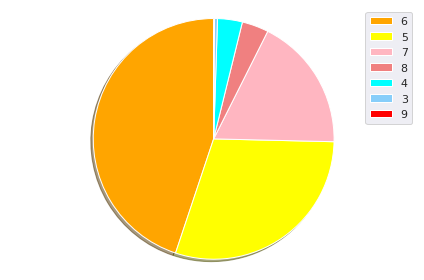

In [ ]:
# Visualising quality
temp = df['quality'].value_counts()
dfviz = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = dfviz['labels']
sizes = dfviz['values']
colors = ['orange', 'yellow', 'lightpink', 'lightcoral','cyan','lightskyblue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
svm_predictions

array([6, 6, 6, ..., 5, 5, 6])

In [ ]:
# Visualising quality
temp = pred_df.value_counts()
dfviz = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = dfviz['labels']
sizes = dfviz['values']
colors = ['orange', 'yellow', 'lightpink', 'lightcoral','cyan','lightskyblue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

AttributeError: 'MultiIndex' object has no attribute '_data'

In [ ]:
pred_df = pd.DataFrame(svm_predictions)
pred_df.head()

,0
0,6
1,5
2,5
3,5
4,6


In [ ]:
X_test.shape

(1960, 11)

Text(0, 0.5, 'real alcohol levels')

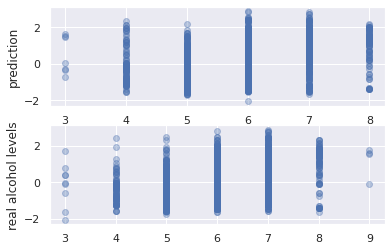

In [ ]:
fig, ax = plt.subplots(2)
ax[0].scatter(pred_df, X_test['alcohol'], label='prediction', alpha=0.35)  # Plot some data on the axes.
ax[1].scatter(y_test, X_test['alcohol'], label='real', alpha=0.35)  # Plot some data on the axes.
ax[0].set_ylabel('prediction')  # Add a y-label to the axes.
ax[1].set_ylabel('real alcohol levels')  # Add an x-label to the axes.

In [ ]:
# plotting decision boundary
alcohol = df['alcohol']
alcohol.head()
density = df['density']
features = pd.concat([alcohol, density], axis = 1)
features.head()
y = df['quality']

In [ ]:
# import some data to play with
# Take the first two features. We could avoid this by using a two-dim dataset
X = features.to_numpy()
y = y.to_numpy()
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.4)

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel='rbf', gamma='auto', C=C)

model = model.fit(X, y)

# title for the plots
titles = ('SVC with RBF kernel')

In [ ]:
features.head()

,alcohol,density
0,8.8,1.0010
1,9.5,0.9940
2,10.1,0.9951
3,9.9,0.9956
4,9.9,0.9956


TypeError: plot_contours() missing 1 required positional argument: 'yy'

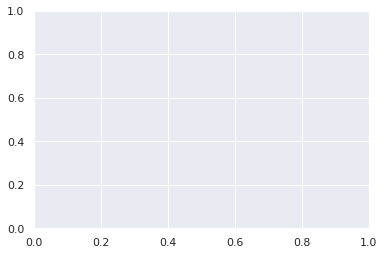

KernelInterrupted: Execution interrupted by the Jupyter kernel.

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:


# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 0]
xx, yy = make_meshgrid(X0, X1)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plot_contours(ax, model, xx, yy, )
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>